# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

## Import Statements

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
import plotly.express as px
import random

## Notebook Presentation

In [162]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [163]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [164]:
for df in [df_hh_income, df_pct_poverty,df_pct_completed_hs,df_share_race_city,df_fatalities]:
    print(f"df shape = {df.shape}")
    print(f"{len(df)} rows, {len(list(df.columns))} columns")
    print(f"column names = {list(df.columns)}")
    nans = df.isnull()
    dups_false = df.duplicated().value_counts(False)
    if dups_false.item()==len(df) or nans:
        print("We have NaNs and/or duplicates")
    print("\n")

df shape = (29322, 3)
29322 rows, 3 columns
column names = ['Geographic Area', 'City', 'Median Income']
We have NaNs and/or duplicates


df shape = (29329, 3)
29329 rows, 3 columns
column names = ['Geographic Area', 'City', 'poverty_rate']
We have NaNs and/or duplicates


df shape = (29329, 3)
29329 rows, 3 columns
column names = ['Geographic Area', 'City', 'percent_completed_hs']
We have NaNs and/or duplicates


df shape = (29268, 7)
29268 rows, 7 columns
column names = ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
We have NaNs and/or duplicates


df shape = (2535, 14)
2535 rows, 14 columns
column names = ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
We have NaNs and/or duplicates



## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [165]:
df_hh_income = df_hh_income.dropna()
df_hh_income = df_hh_income.drop_duplicates()

df_pct_poverty = df_pct_poverty.dropna()
df_pct_poverty = df_pct_poverty.drop_duplicates()

df_pct_completed_hs = df_pct_completed_hs.dropna()
df_pct_completed_hs = df_pct_completed_hs.drop_duplicates()

df_share_race_city = df_share_race_city.dropna()
df_share_race_city = df_share_race_city.drop_duplicates()

df_fatalities = df_fatalities.dropna()
df_fatalities = df_fatalities.drop_duplicates()

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

<BarContainer object of 51 artists>

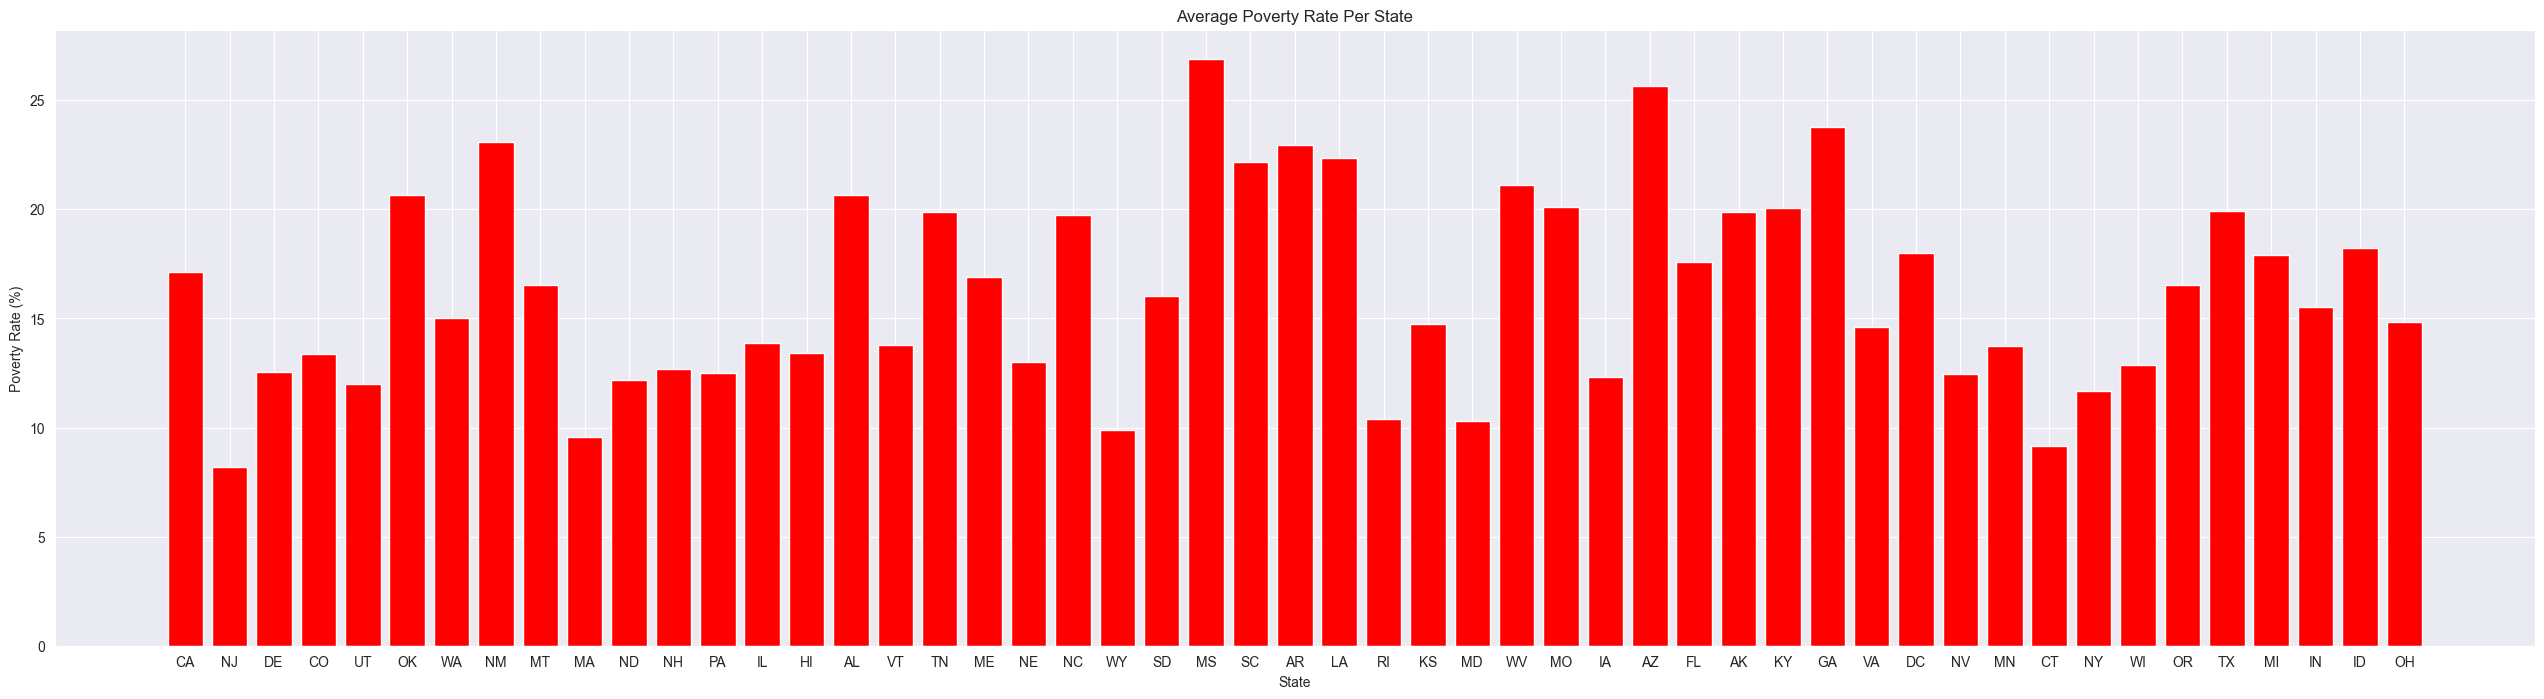

In [166]:
states = list(set(df_pct_poverty['Geographic Area'].values))
poverty_rates = []

x = df_pct_poverty.groupby('Geographic Area')
for state in states:
    _x = x.get_group(state)
    _pov_rates =[float(pr) for pr in _x['poverty_rate'].values if pr != '-']
    avg_pr = sum(_pov_rates) / len(_pov_rates)
    poverty_rates.append(avg_pr)

plt.figure(figsize=(32,8))
plt.title("Average Poverty Rate Per State")
plt.xlabel("State")
plt.ylabel("Poverty Rate (%)")
plt.bar(states, poverty_rates, color='red')

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

<BarContainer object of 51 artists>

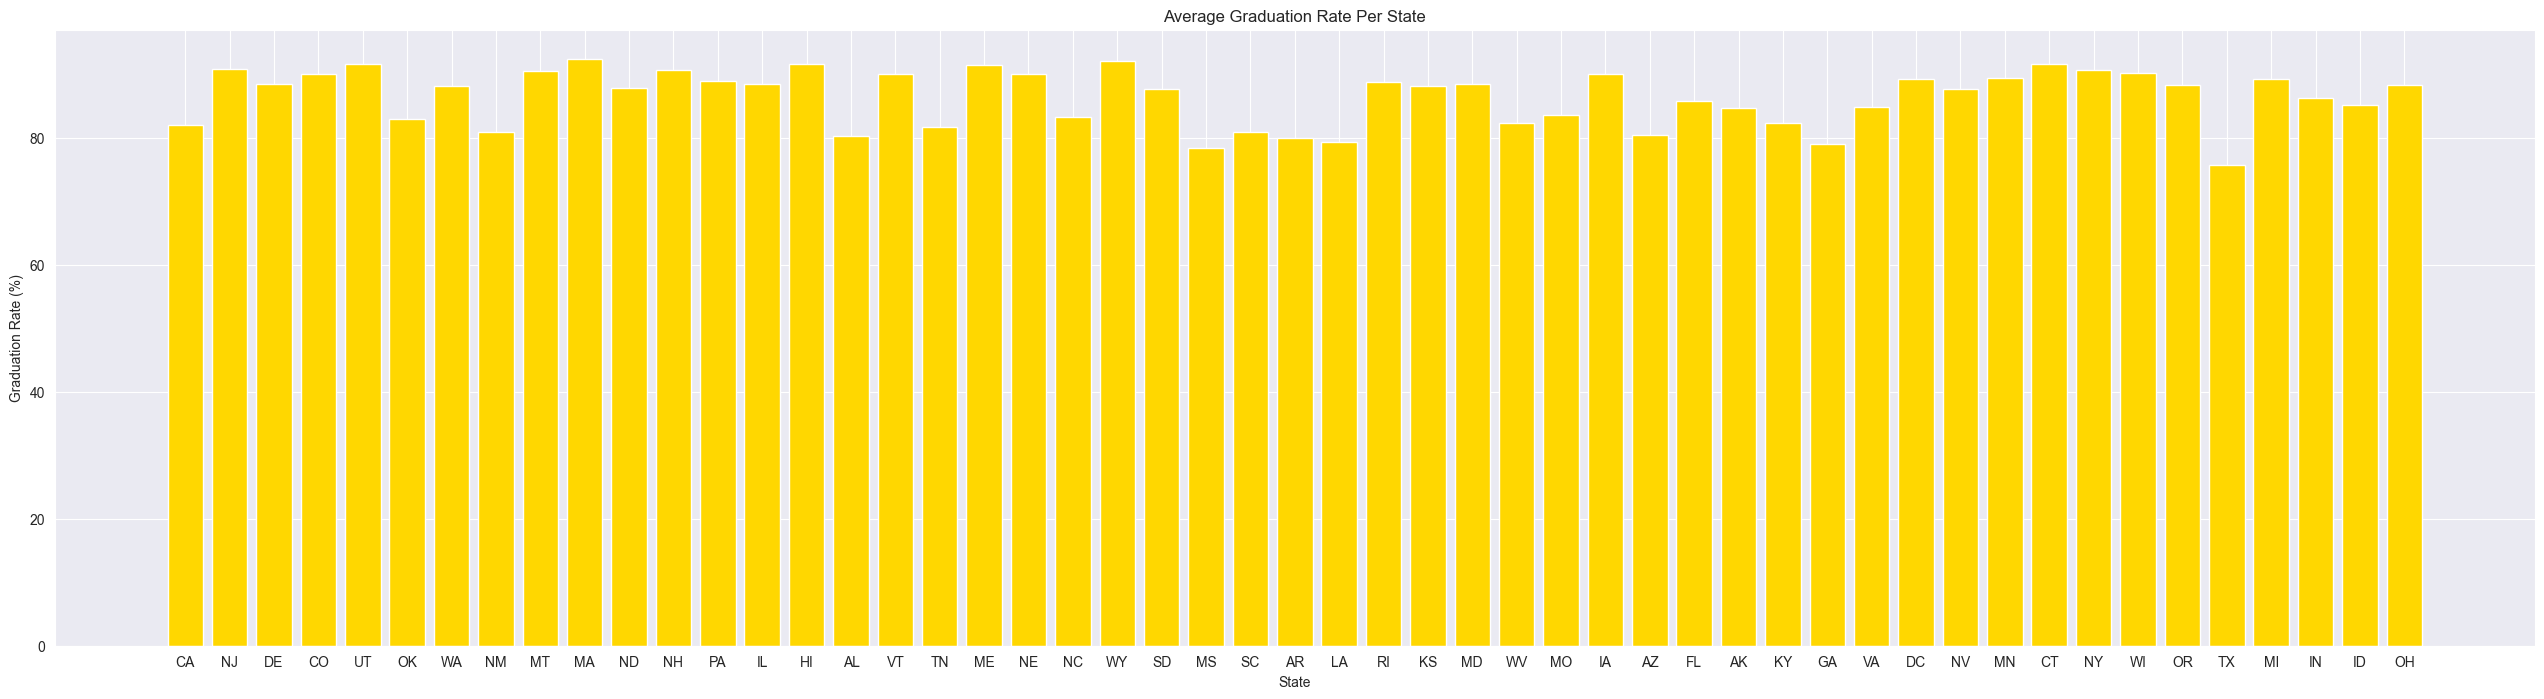

In [167]:
grad_rates = []
x = df_pct_completed_hs.groupby('Geographic Area')
for state in states:
    _x = x.get_group(state)
    _grad_rates =[float(pr) for pr in _x['percent_completed_hs'].values if pr != '-']
    avg_gr = sum(_grad_rates) / len(_grad_rates)
    grad_rates.append(avg_gr)

plt.figure(figsize=(32,8))
plt.title("Average Graduation Rate Per State")
plt.xlabel("State")
plt.ylabel("Graduation Rate (%)")
plt.bar(states, grad_rates, color='gold')

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the ratios of poverty and high school graduation move together.  

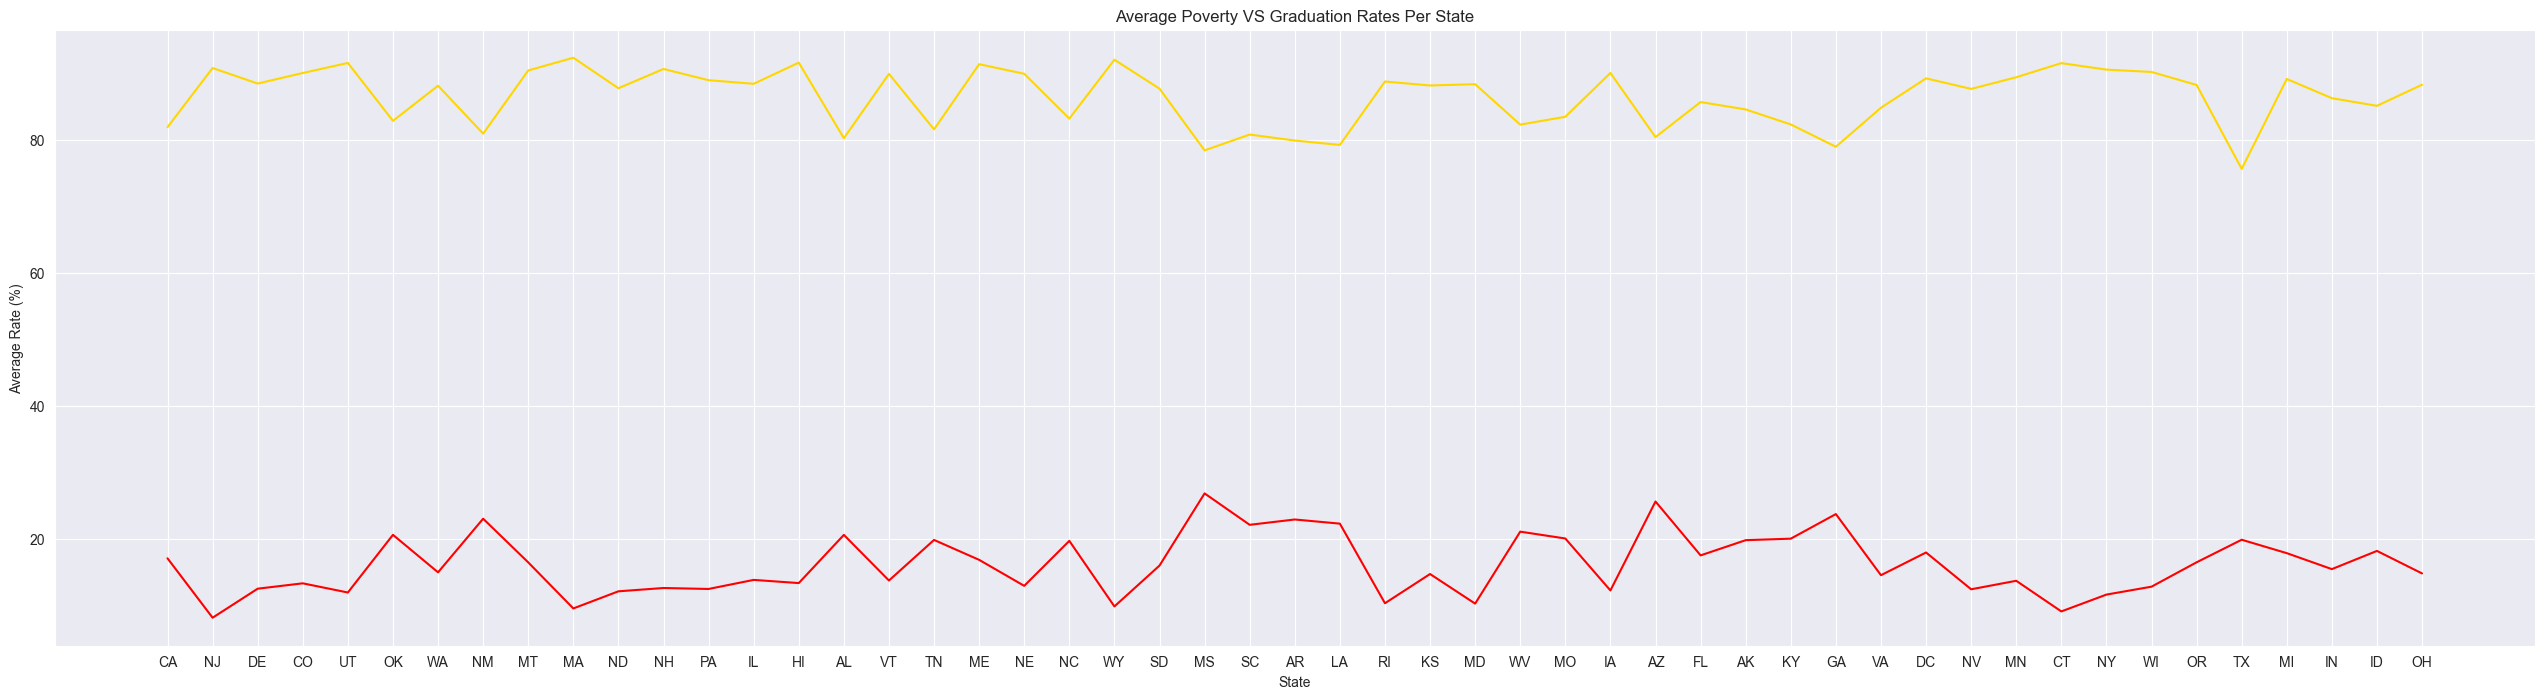

In [168]:
plt.figure(figsize=(32,8))
plt.xlabel("State")
plt.ylabel("Average Rate (%)")
plt.title("Average Poverty VS Graduation Rates Per State")
plt.plot(states, poverty_rates, color='red')
plt.plot(states, grad_rates, color='gold')

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

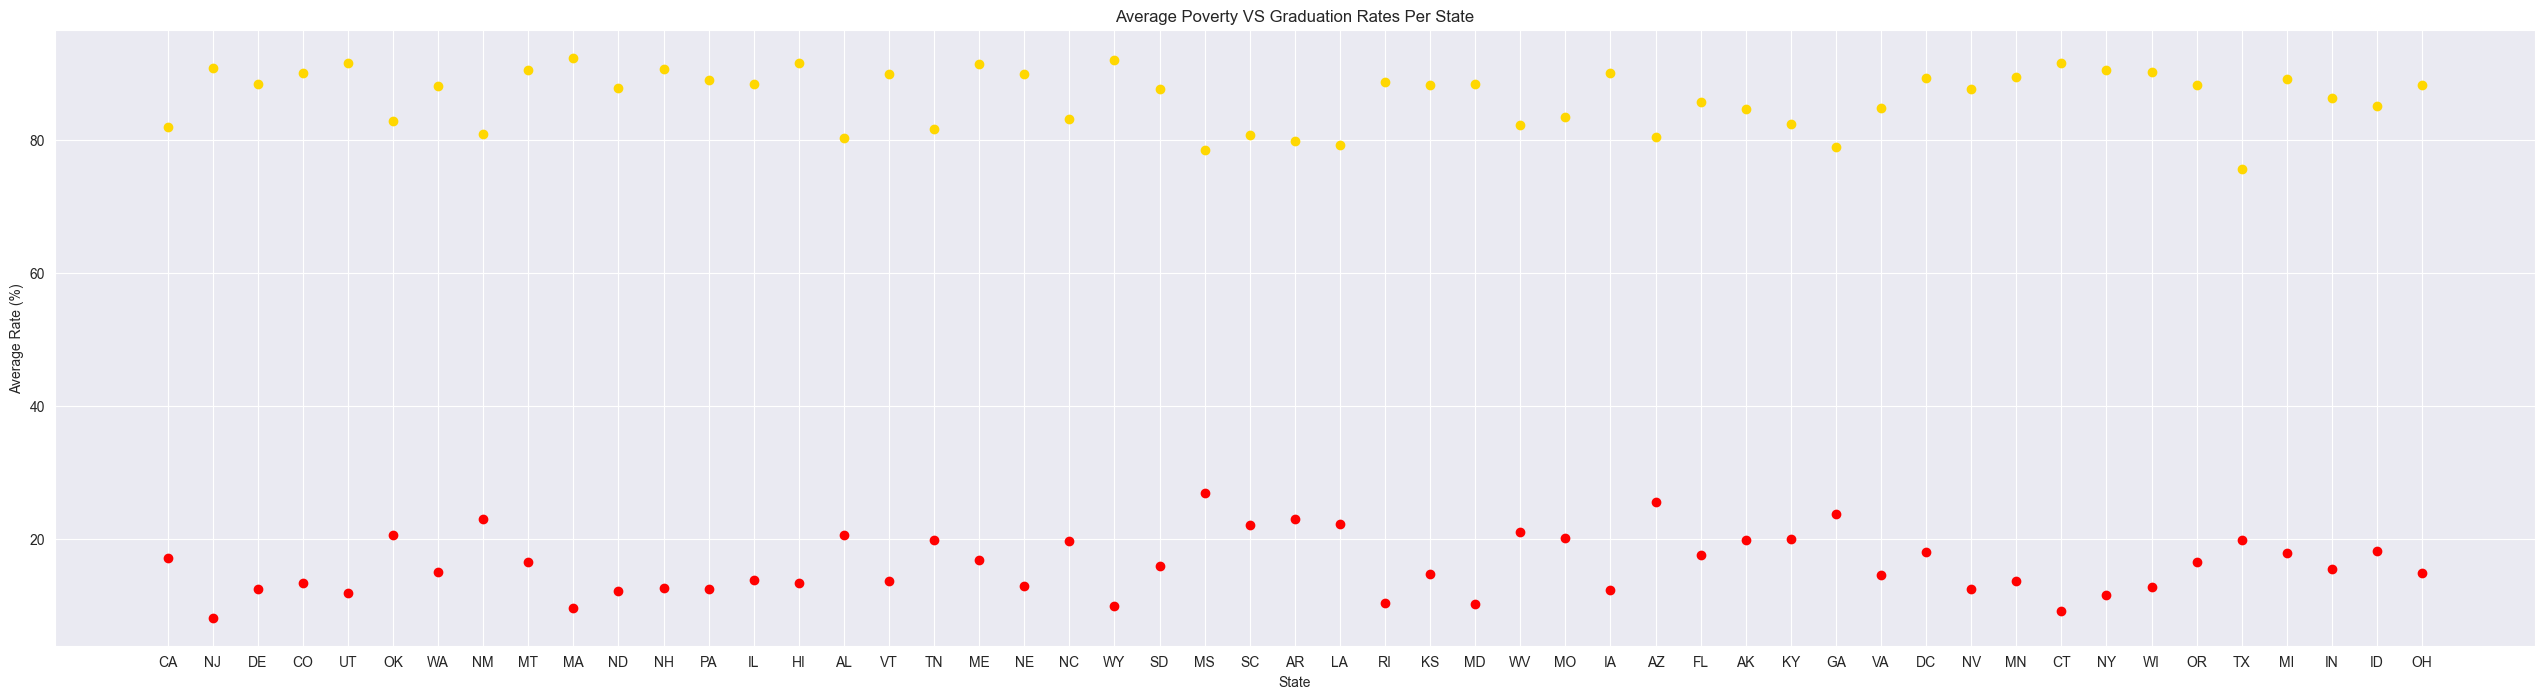

In [169]:
plt.figure(figsize=(32,8))
plt.xlabel("State")
plt.ylabel("Average Rate (%)")
plt.title("Average Poverty VS Graduation Rates Per State")
plt.scatter(states, poverty_rates, color='red')
plt.scatter(states, grad_rates, color='gold')

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U2'), dtype('float64')) -> None

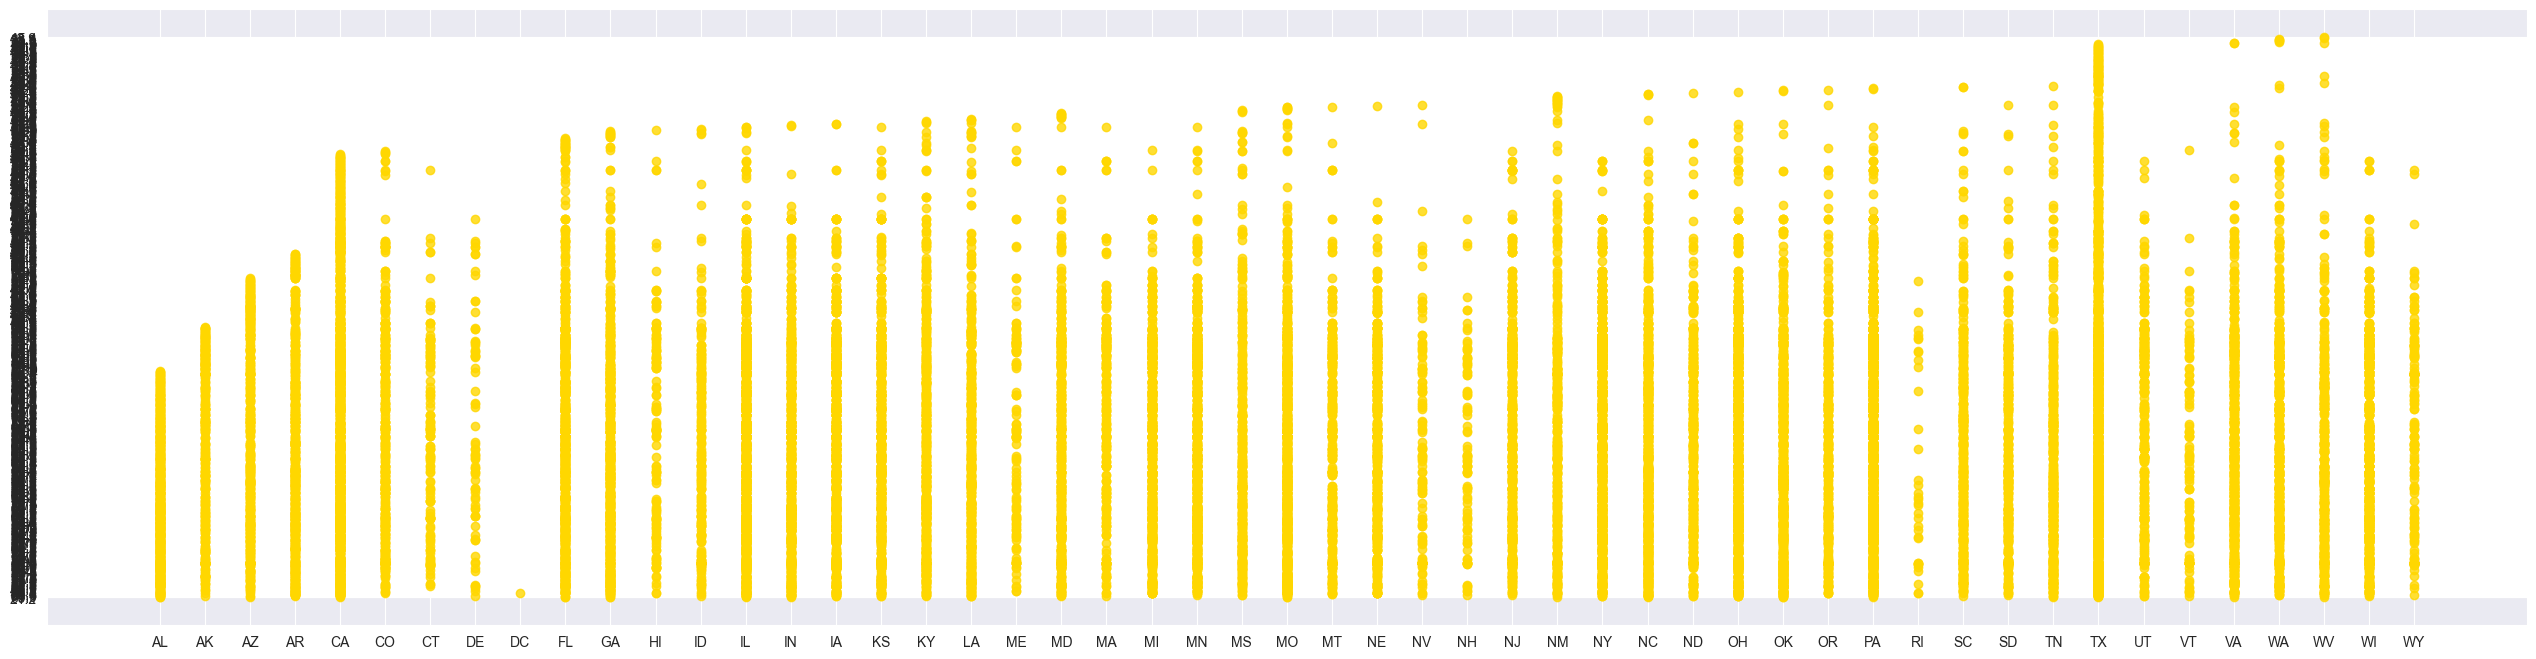

In [194]:
plt.figure(figsize=(32,8))
sns.regplot(x='Geographic Area', y='percent_completed_hs', data=df_pct_completed_hs, color='gold', dropna=True)
plt.figure(figsize=(32,8))
sns.regplot(x='Geographic Area', y='poverty_rate', data=df_pct_poverty, color='red', dropna=True)

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

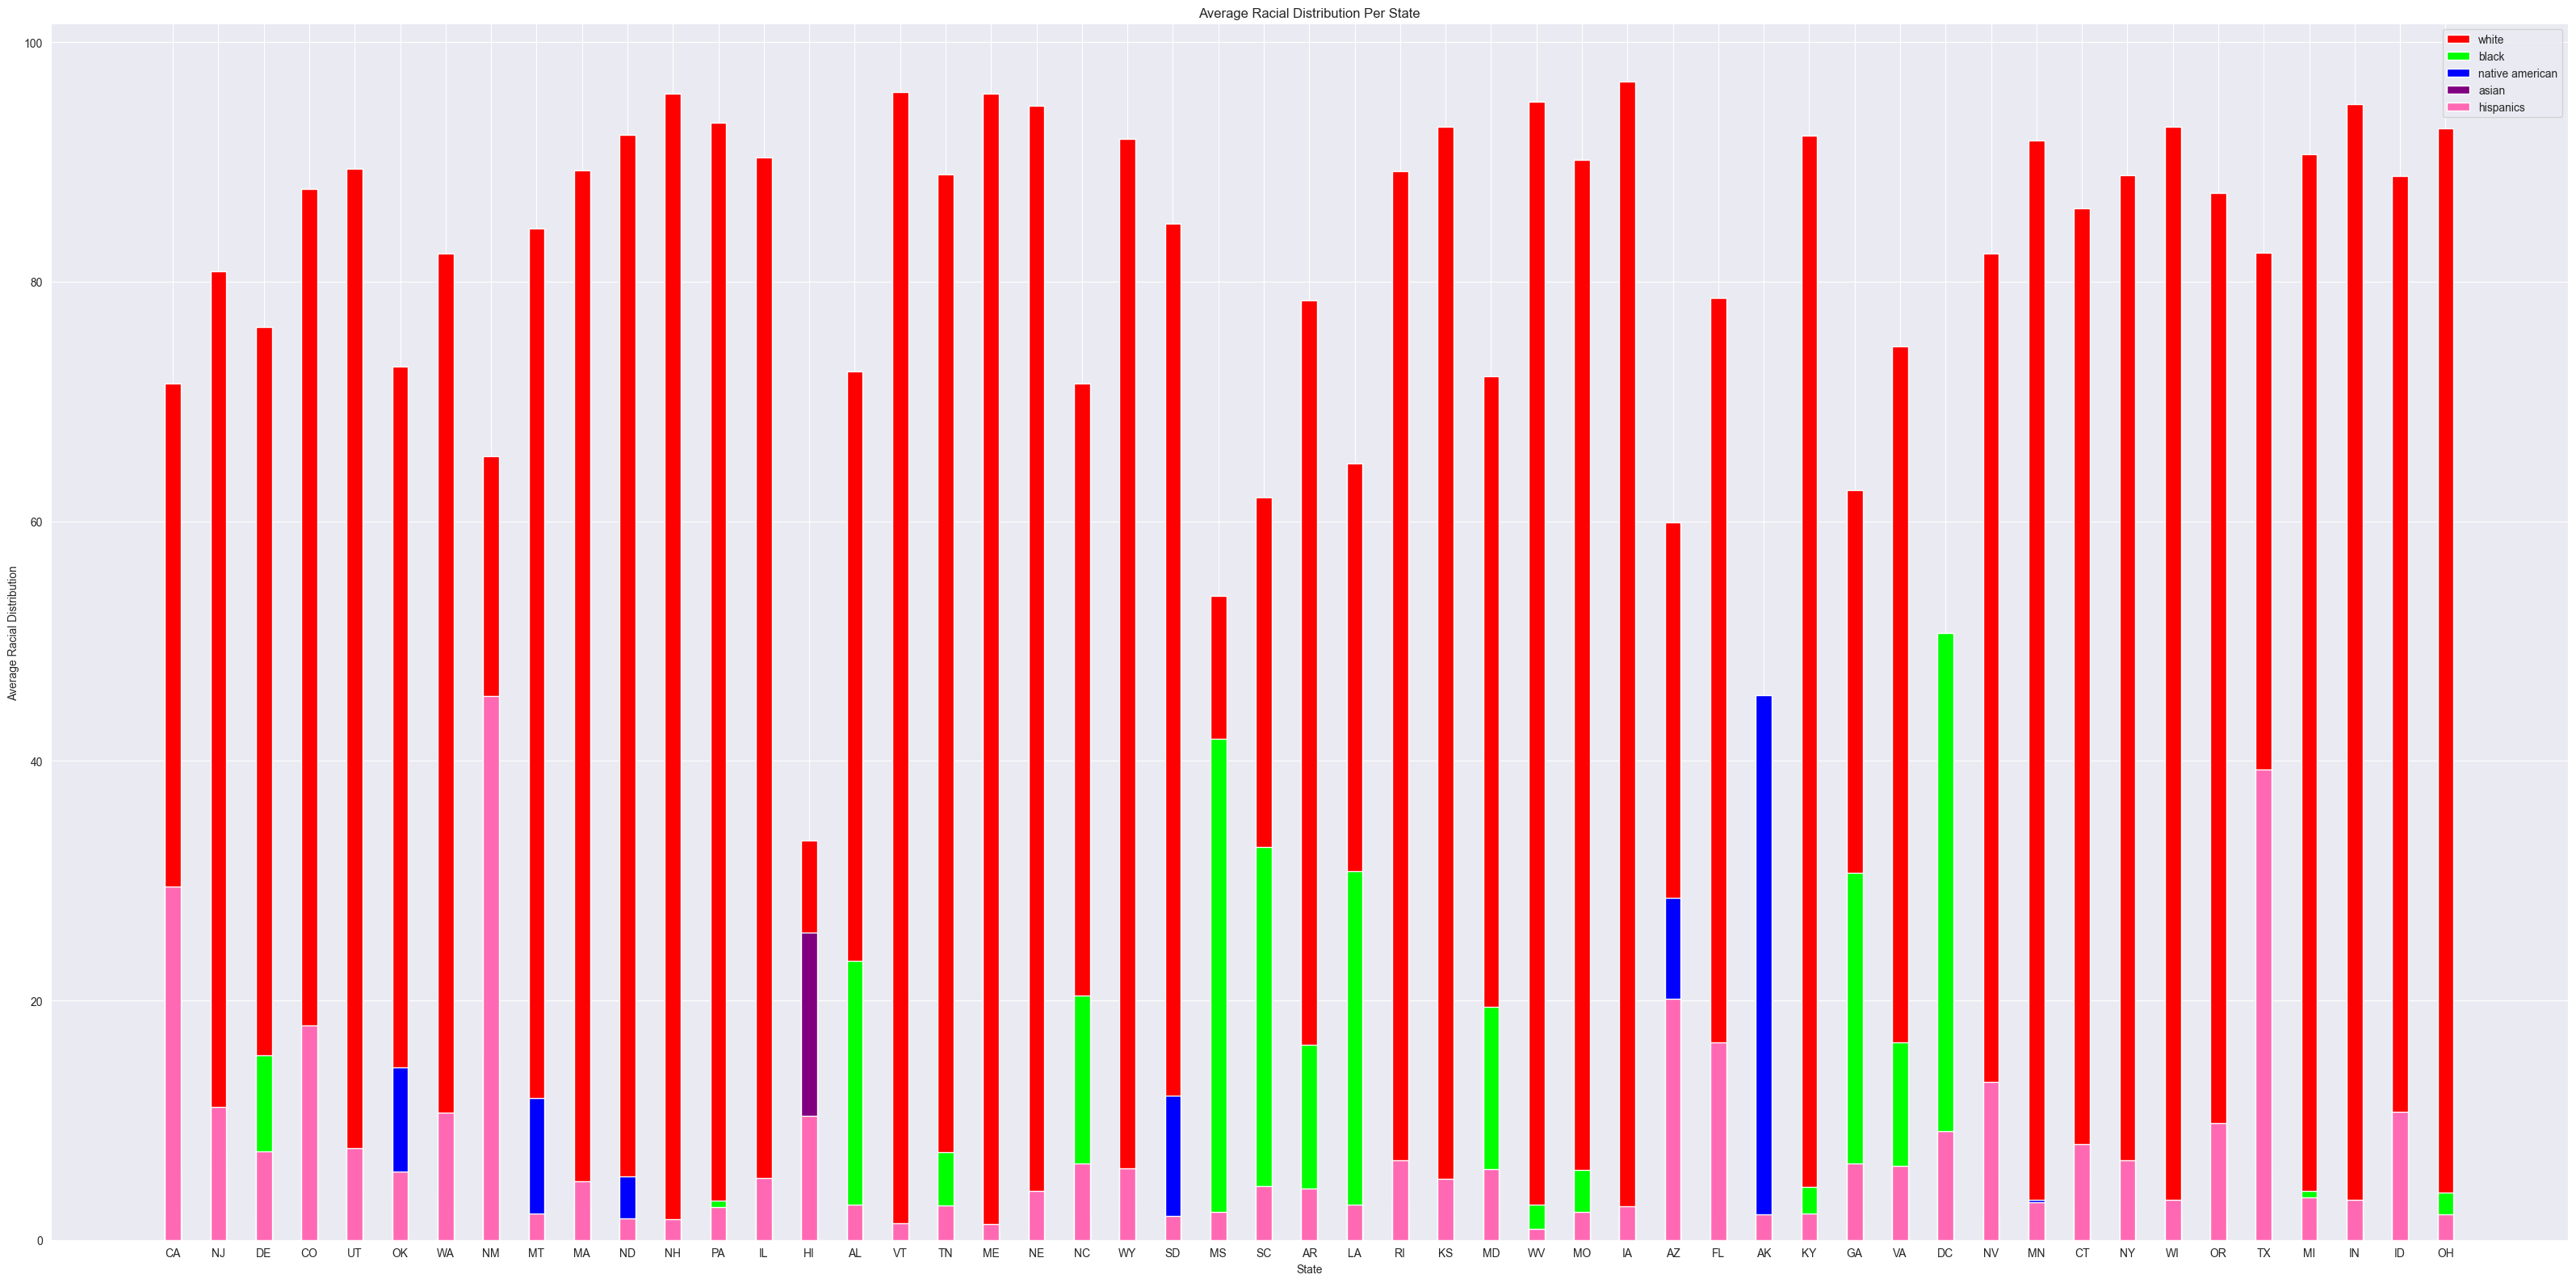

In [14]:
whites = [float(w) if w != '(X)' else 0 for w in df_share_race_city['share_white'].values]
blacks = [float(w) if w != '(X)' else 0  for w in df_share_race_city['share_black'].values]
natame = [float(w) if w != '(X)' else 0  for w in df_share_race_city['share_native_american'].values]
asian = [float(w) if w != '(X)' else 0  for w in df_share_race_city['share_asian'].values]
hispanic = [float(w) if w != '(X)' else 0  for w in df_share_race_city['share_hispanic'].values]

df_share_race_city['share_white']=whites
df_share_race_city['share_black']=blacks
df_share_race_city['share_native_american']=natame
df_share_race_city['share_asian']=asian
df_share_race_city['share_hispanic']=hispanic

x = df_share_race_city.groupby('Geographic area')

# print(whites)
_whites, _blacks, _natnames, _asians, _hispanics = ([], [], [], [], [])
for state in states:
    _x = x.get_group(state)
    avg_white = sum(_x['share_white'].values) / len(_x['share_white'].values)
    avg_black = sum(_x['share_black'].values) / len(_x['share_black'].values)
    avg_natame = sum(_x['share_native_american'].values) / len(_x['share_native_american'].values)
    avg_asian = sum(_x['share_asian'].values) / len(_x['share_asian'].values)
    avg_hispanic = sum(_x['share_hispanic'].values) / len(_x['share_hispanic'].values)
    
    _whites.append(avg_white)
    _blacks.append(avg_black)
    _natnames.append(avg_natame)
    _asians.append(avg_asian)
    _hispanics.append(avg_hispanic)

ind = np.arange(len(states))

fig = plt.figure(figsize=(32,16))
ax = fig.add_subplot(111)
ax.bar(x=ind, height=_whites, width=0.35,align='center', color='red', label='white')
ax.bar(x=ind, height=_blacks, width=0.35,  align='center', color='lime', label='black')
ax.bar(x=ind, height=_natnames, width=0.35,align='center', color='blue', label='native american')
ax.bar(x=ind, height=_asians, width=0.35,  align='center', color='purple', label='asian')
ax.bar(x=ind, height=_hispanics, width=0.35,align='center', color='hotpink', label='hispanics')

plt.title("Average Racial Distribution Per State")
plt.xlabel("State")
plt.ylabel("Average Racial Distribution")
plt.xticks(ind, states)
plt.legend()
plt.tight_layout()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [15]:
hex_vals = ['a','b','c','d','e','f',0,1,2,3,4,5,6,7,8,9]
def get_random_color():
    color = '#'
    for _ in range(6):
        color += str(random.choice(hex_vals))
    return color.upper()

In [16]:
races = list(set(df_fatalities['race'].values))
chart_colors = [get_random_color() for _ in range(len(races))]
num_of_ppl_killed = [0]*len(races)
race_groups = df_fatalities.groupby('race')
for r in range(len(races)):
    num_of_ppl_killed[r] = len(race_groups.get_group(races[r]))

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

Text(0.5, 1.0, 'People Killed by Race')

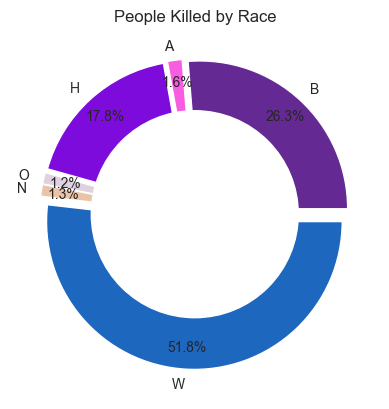

In [17]:
plt.figure()
# explosion
explode = tuple([0.05]*len(races))
 
# Pie Chart
plt.pie(num_of_ppl_killed, colors=chart_colors, labels=races,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('People Killed by Race')

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [90]:
male_deaths = df_fatalities[df_fatalities['gender']=='M']
female_deaths = df_fatalities[df_fatalities['gender']=='F']
manners_of_death_counts_male = male_deaths.groupby('manner_of_death').count()['id'].to_dict()
manners_of_death_counts_female = female_deaths.groupby('manner_of_death').count()['id'].to_dict()
print(f"MALES: {manners_of_death_counts_male}")
print(f"FEMALES: {manners_of_death_counts_female}")

MALES: {'shot': 2011, 'shot and Tasered': 149}
FEMALES: {'shot': 89, 'shot and Tasered': 5}


In [107]:
males_shot_ages = male_deaths[male_deaths['manner_of_death']=='shot'].age.values.tolist()
males_shot_ages = sorted(males_shot_ages)

males_shot_ages_min = min(males_shot_ages)
males_shot_ages_max = max(males_shot_ages)

males_shot_ages_med = 0
if len(males_shot_ages) % 2 != 0:
    males_shot_ages_med = males_shot_ages[ len(males_shot_ages) // 2 ]
else:
    hi = len(males_shot_ages)//2
    males_shot_ages_med = (males_shot_ages[hi] + males_shot_ages[hi-1])/2
    

males_shot_tased_ages = male_deaths[male_deaths['manner_of_death']=='shot and Tasered'].age.values.tolist()
males_shot_tased_ages = sorted(males_shot_tased_ages)

males_shot_tased_ages_min = min(males_shot_tased_ages)
males_shot_tased_ages_max = max(males_shot_tased_ages)

males_shot_tased_ages_med = 0
if len(males_shot_tased_ages) % 2 != 0:
    males_shot_tased_ages_med = males_shot_tased_ages[ len(males_shot_tased_ages) // 2 ]
else:
    hi = len(males_shot_tased_ages)//2
    males_shot_tased_ages_med = (males_shot_tased_ages[hi] + males_shot_tased_ages[hi-1])/2

In [108]:
# female_deaths
females_shot_ages = female_deaths[female_deaths['manner_of_death']=='shot'].age.values.tolist()
females_shot_ages = sorted(females_shot_ages)

females_shot_ages_min = min(females_shot_ages)
females_shot_ages_max = max(females_shot_ages)

females_shot_ages_med = 0
if len(females_shot_ages) % 2 != 0:
    females_shot_ages_med = females_shot_ages[ len(females_shot_ages) // 2 ]
else:
    hi = len(females_shot_ages)//2
    females_shot_ages_med = (females_shot_ages[hi] + females_shot_ages[hi-1])/2

females_shot_tased_ages = female_deaths[female_deaths['manner_of_death']=='shot and Tasered'].age.values.tolist()
females_shot_tased_ages = sorted(females_shot_tased_ages)

females_shot_tased_ages_min = min(females_shot_tased_ages)
females_shot_tased_ages_max = max(females_shot_tased_ages)

females_shot_tased_ages_med = 0
if len(females_shot_tased_ages) % 2 != 0:
    females_shot_tased_ages_med = females_shot_tased_ages[ len(females_shot_tased_ages) // 2 ]
else:
    hi = len(females_shot_tased_ages)//2
    females_shot_tased_ages_med = (females_shot_tased_ages[hi] + females_shot_tased_ages[hi-1])/2

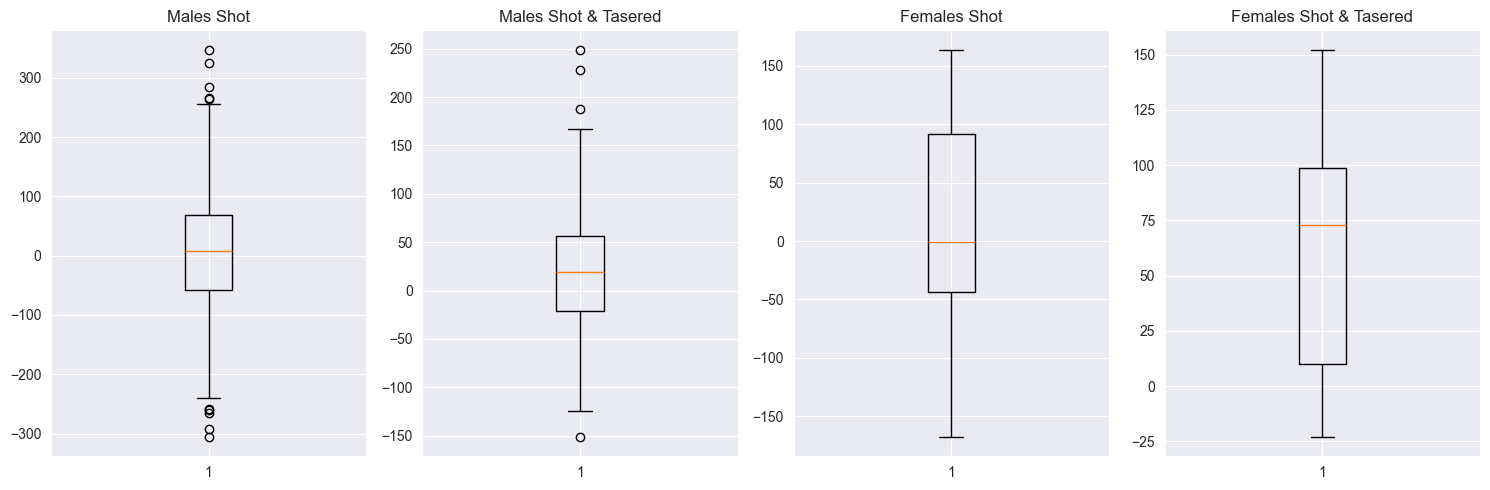

In [109]:
data1 = np.random.normal(males_shot_ages_min, males_shot_ages_max, len(males_shot_ages))
data2 = np.random.normal(females_shot_ages_min, females_shot_ages_max, len(females_shot_ages))

data3 = np.random.normal(males_shot_tased_ages_min, males_shot_tased_ages_max, len(males_shot_tased_ages))
data4 = np.random.normal(females_shot_tased_ages_min, females_shot_tased_ages_max, len(females_shot_tased_ages))

# Creates subplots
fig, axs = plt.subplots(1, 4, figsize=(15, 5))

axs[0].boxplot(data1)
axs[0].set_title('Males Shot')

axs[1].boxplot(data3)
axs[1].set_title('Males Shot & Tasered')

axs[2].boxplot(data2)
axs[2].set_title('Females Shot')

axs[3].boxplot(data4)
axs[3].set_title('Females Shot & Tasered')

# Adjusts layout
plt.tight_layout()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [26]:
armed_cases = df_fatalities[(df_fatalities['armed'] != 'unarmed')]
percentage =( len(armed_cases) / len(df_fatalities) ) * 100
print(f"{percentage}% of killed people were armed.")

92.67968056787933% of killed people were armed.


<BarContainer object of 33 artists>

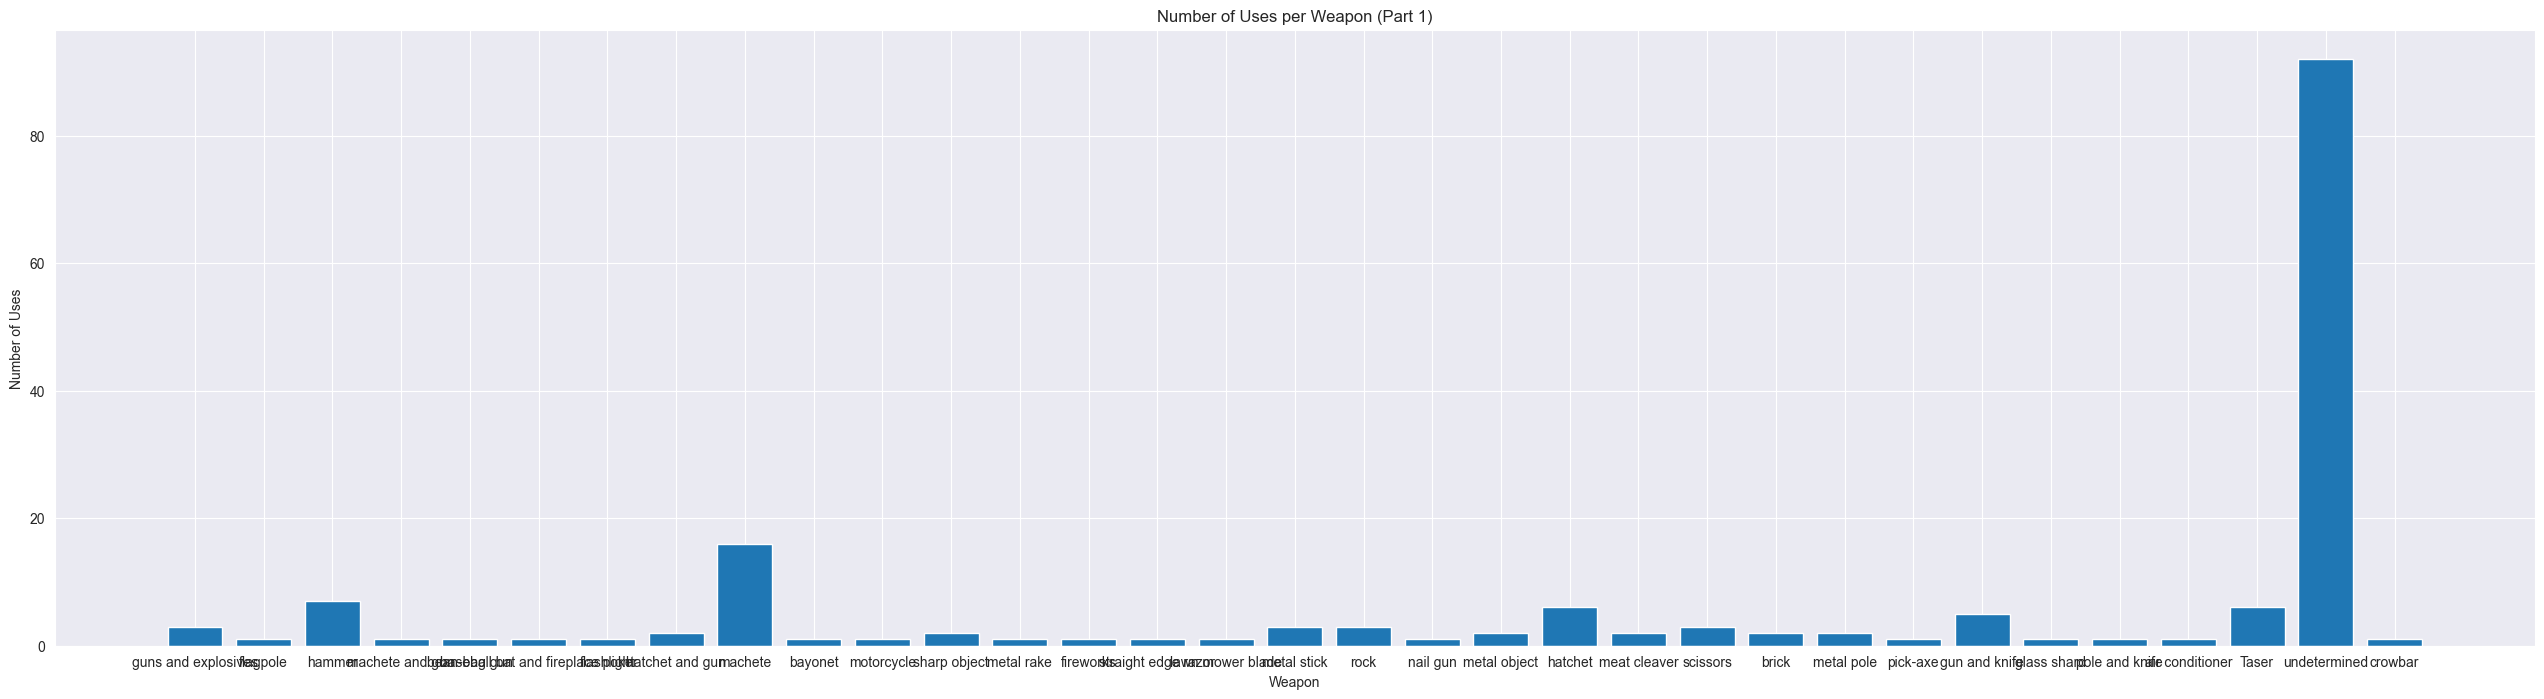

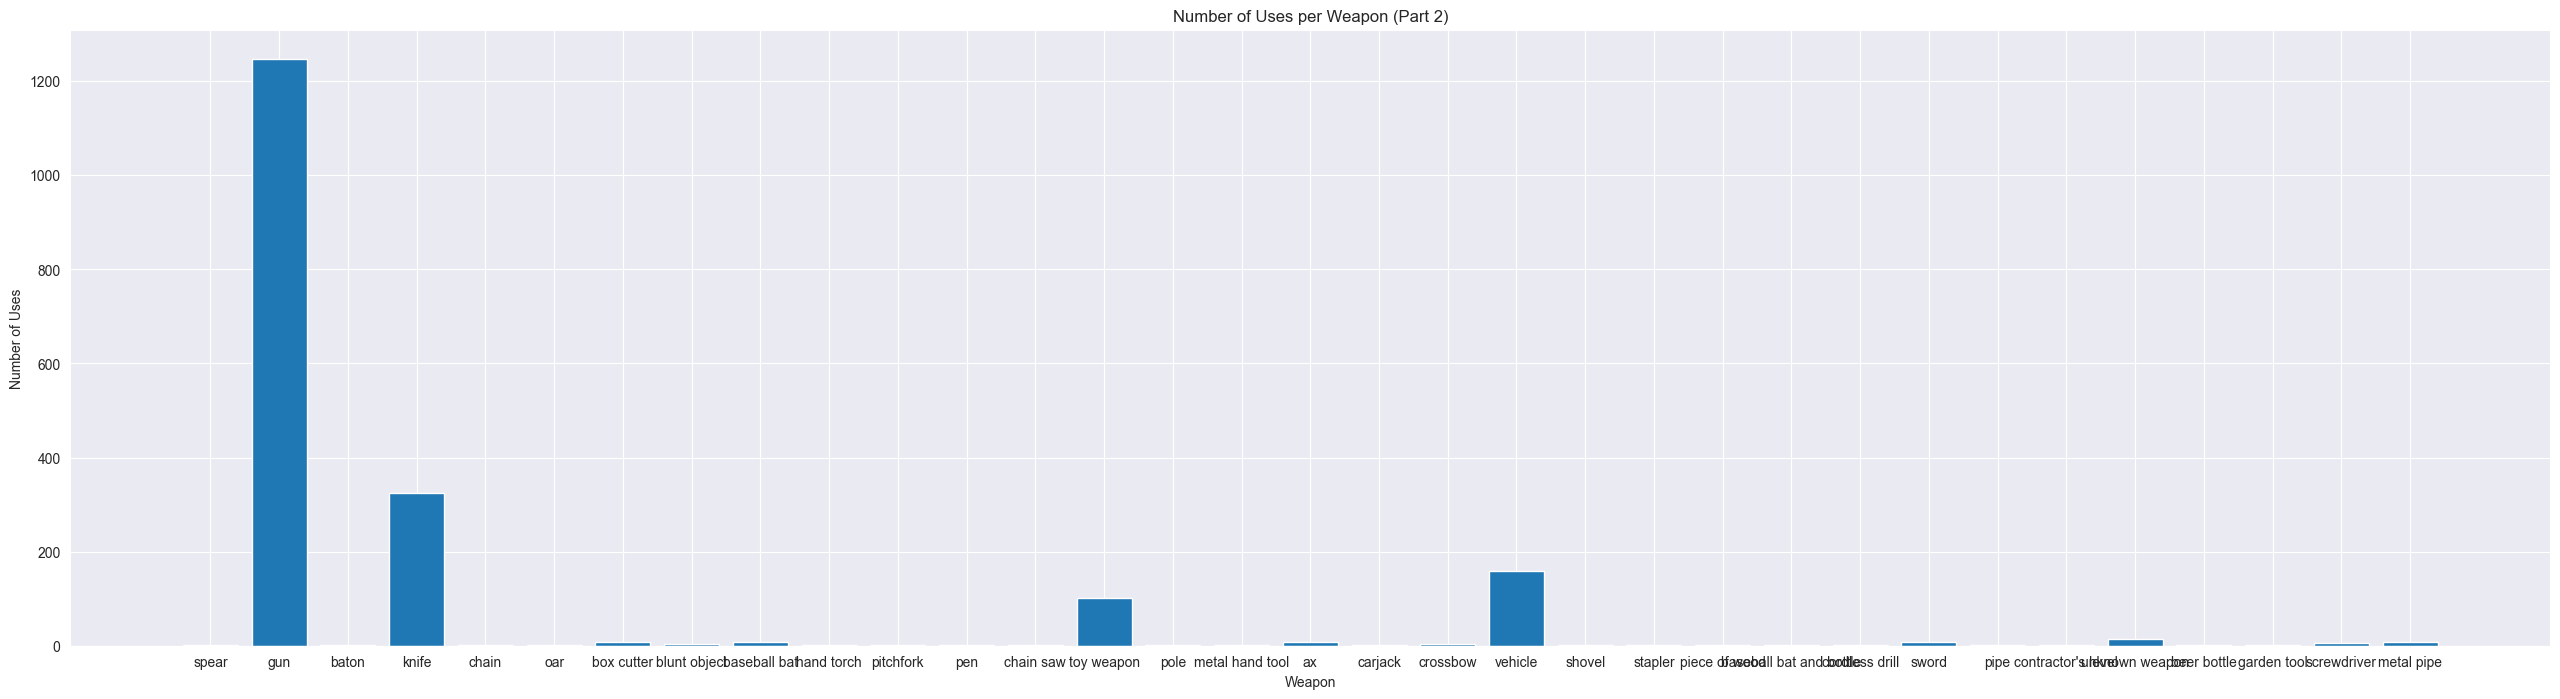

In [27]:
weapons = list(set(armed_cases['armed'].values))
weapon_use_count = [0]*len(weapons)
for w in range(len(weapons)):
    weapon_use_count[w] = len(armed_cases[armed_cases['armed']==weapons[w]])

plt.figure(figsize=(32,8))
plt.title("Number of Uses per Weapon (Part 1)")
plt.xlabel("Weapon")
plt.ylabel("Number of Uses")
plt.bar(weapons[:33], weapon_use_count[:33])

plt.figure(figsize=(32,8))
plt.title("Number of Uses per Weapon (Part 2)")
plt.xlabel("Weapon")
plt.ylabel("Number of Uses")
plt.bar(weapons[33:], weapon_use_count[33:])

In [28]:
gun_use_count = len(armed_cases[armed_cases['armed']=='gun'])
unarmed_count = len(df_fatalities[df_fatalities['armed']=='unarmed'])
print(f"{gun_use_count} people were armed with a gun when killed.")
print(f"{unarmed_count} people were unarmed when killed.")

1247 people were armed with a gun when killed.
165 people were unarmed when killed.


# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [110]:
u25 = len(df_fatalities[df_fatalities['age'] < 25])
perc_u25 = round((u25 / len(df_fatalities))*100, 2)
print(f"{u25} of the people killed were under 25 years old, which is {perc_u25}% of all fatalities.")

422 of the people killed were under 25 years old, which is 18.72% of all fatalities.


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

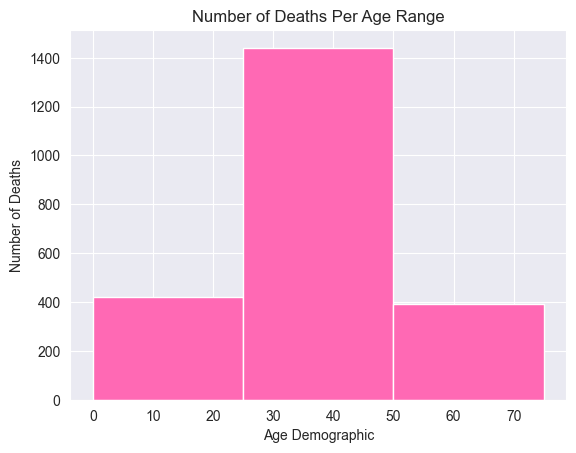

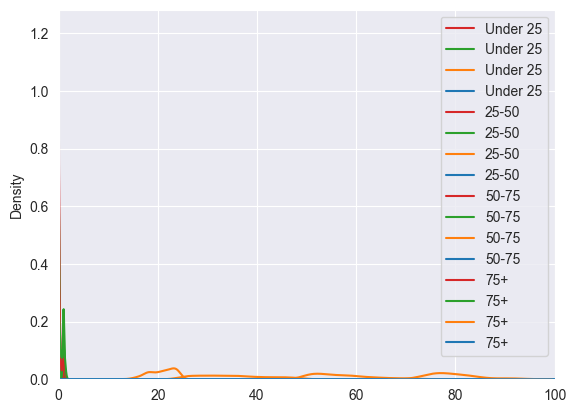

In [159]:
q1 = df_fatalities[df_fatalities['age'] < 25]
q2 = df_fatalities[(25 <= df_fatalities['age']) & (df_fatalities['age'] < 50)]
q3 = df_fatalities[(50 <= df_fatalities['age']) & (df_fatalities['age'] < 75) ]
q4 = df_fatalities[df_fatalities['age'] >= 75 ]

plt.figure()
plt.hist(x=[0, 25, 50, 75], bins=[0, 25, 50, 75], weights=[len(q1), len(q2), len(q3), len(q4)], color='hotpink')
plt.xlabel("Age Demographic")
plt.ylabel("Number of Deaths")
plt.title("Number of Deaths Per Age Range")

labels = ['Under 25', '25-50', '50-75', '75+']
quarters = [q1, q2, q3, q4]
plt.figure()
plt.xlim(0,100)
for q in range(4):
    sns.kdeplot(quarters[q], color=get_random_color(), label=labels[q])
plt.legend()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

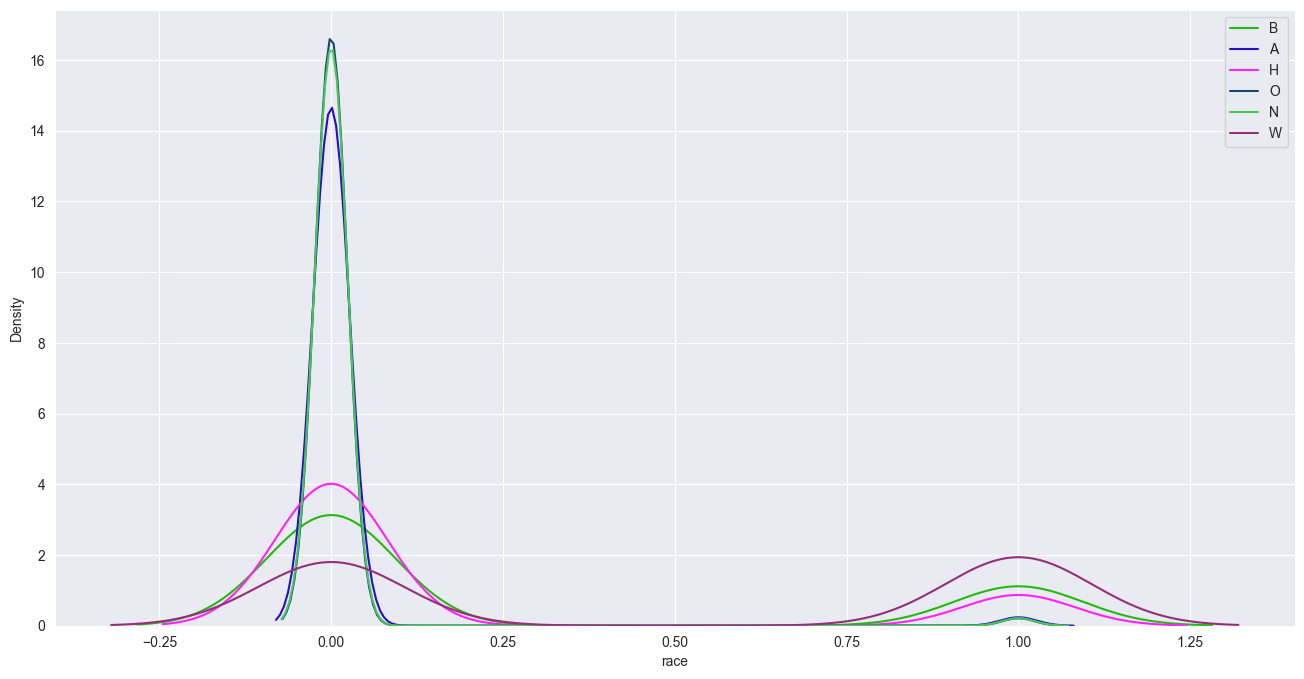

In [160]:
races = list(set(df_fatalities['race'].values))
plt.figure(figsize=(16,8))
for race in races:
    sns.kdeplot((df_fatalities['race']==race), color=get_random_color(), label=race)
plt.legend()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [30]:
races = list(set(df_fatalities['race'].values))
num_of_ppl_killed = [0]*len(races)
race_groups = df_fatalities.groupby('race')
for r in range(len(races)):
    num_of_ppl_killed[r] = len(race_groups.get_group(races[r]))

<BarContainer object of 6 artists>

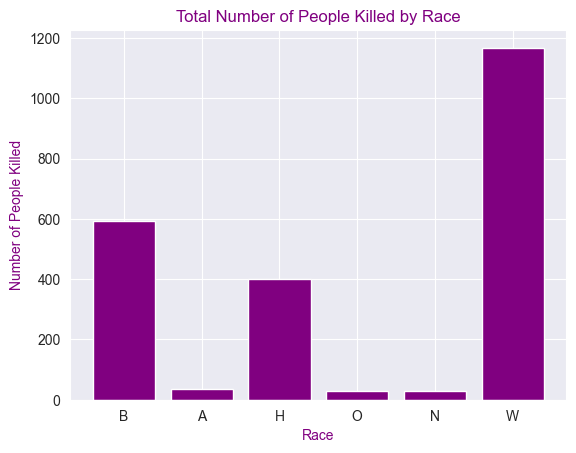

In [31]:
plt.figure()
plt.title("Total Number of People Killed by Race", color='purple')
plt.xlabel("Race", color='purple')
plt.ylabel("Number of People Killed", color='purple')
plt.bar(races, num_of_ppl_killed, color='purple')

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [32]:
illness_count = df_fatalities[df_fatalities['signs_of_mental_illness']==True]
perc_illness = round((len(illness_count) * 100)/len(df_fatalities), 2)
print(f"{perc_illness}% of killed people have been diagnosed with a mental illness.")

25.42% of killed people have been diagnosed with a mental illness.


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [55]:
top10_city_groups = df_fatalities.groupby('city').count().sort_values(by=['id'], ascending=False)[:10]
top10_cities = list(top10_city_groups.index)
killings = top10_city_groups['id'].values.tolist()

<BarContainer object of 10 artists>

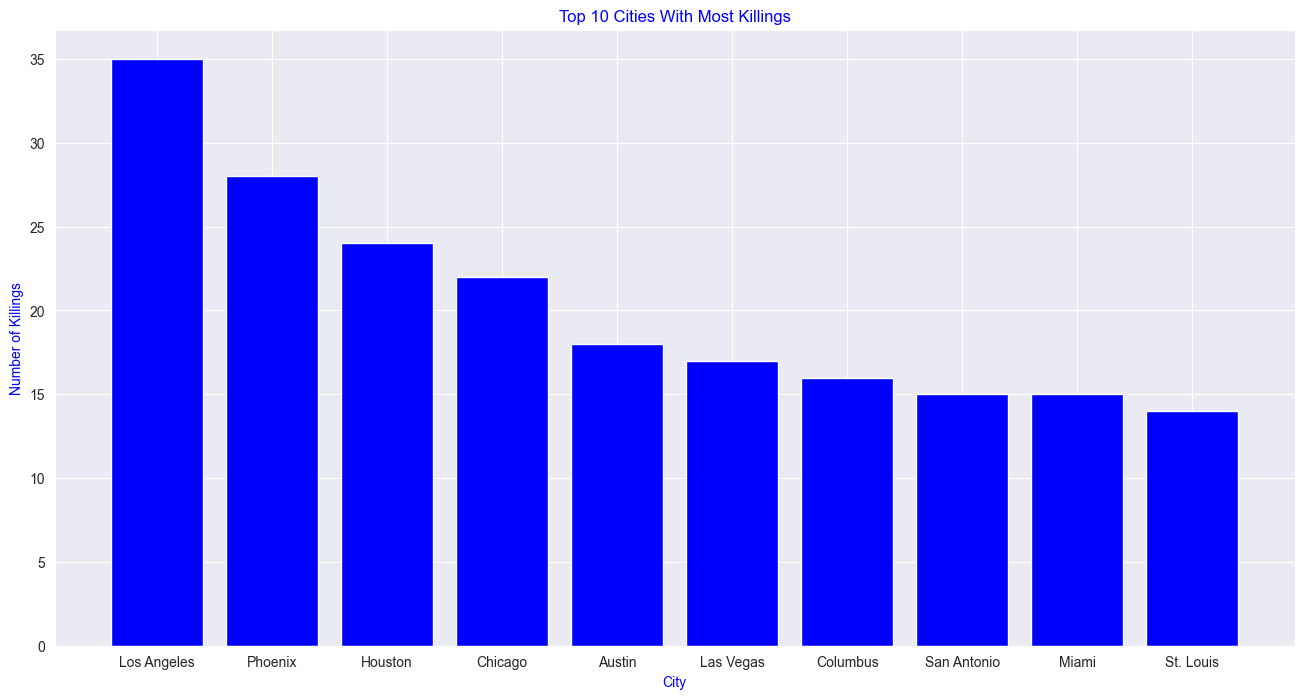

In [56]:
plt.figure(figsize=(16,8))
plt.title("Top 10 Cities With Most Killings", color='blue')
plt.xlabel("City", color='blue')
plt.ylabel("Number of Killings", color='blue')
plt.bar(top10_cities, killings, color='blue')

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [73]:
race_distribution = {'white':0, 'black':0, 'native_american':0, 'asian':0, 'hispanic':0}
results = {city_name:race_distribution for city_name in top10_cities}

for city in top10_cities:
    for race in ['white', 'black', 'native_american', 'asian', 'hispanic']:
        city_filter = df_share_race_city[df_share_race_city['City']==city]
        race_filter = city_filter[f'share_{race}']
        results[city][race] = race_filter.item() if len(race_filter)>0 else 0

print(results)

{'Los Angeles': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Phoenix': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Houston': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Chicago': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Austin': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Las Vegas': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Columbus': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'San Antonio': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'Miami': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}, 'St. Louis': {'white': 0, 'black': 0, 'native_american': 0, 'asian': 0, 'hispanic': 0}}


# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [41]:
# killings per state
killings = df_fatalities.groupby('state').count().sort_values(by=['id'], ascending=False)
states = list(killings.index)
killings_per_state = killings['id'].values.tolist()

# poverty rates per state
avg_poverty_rates_per_state = []

poverties = df_pct_poverty.groupby('Geographic Area')
for state in states:
    _x = poverties.get_group(state)
    _pov_rates =[float(pr) for pr in _x['poverty_rate'].values if pr != '-']
    avg_pr = sum(_pov_rates) / len(_pov_rates)
    avg_poverty_rates_per_state.append(avg_pr)

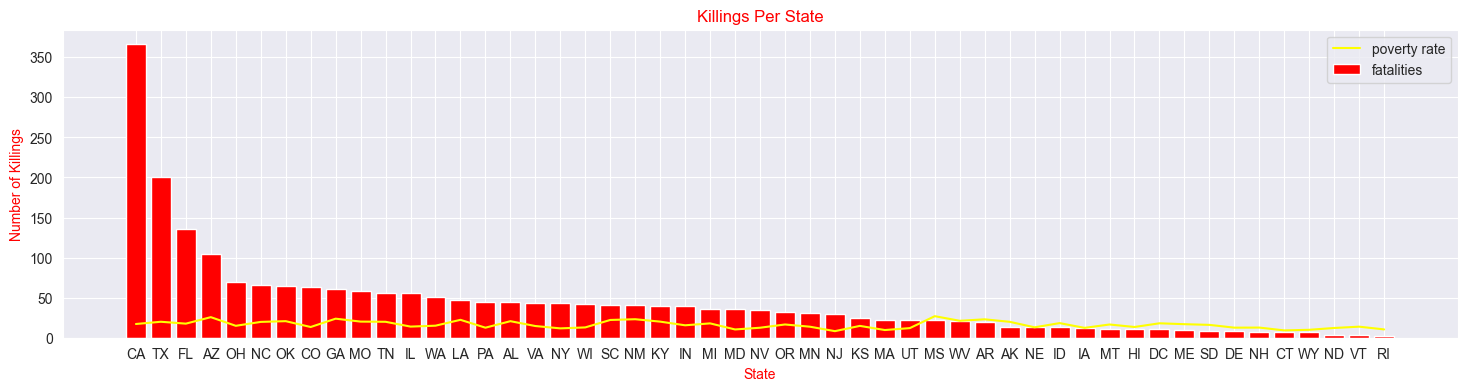

In [42]:
plt.figure(figsize=(18,4))
plt.title("Killings Per State", color='red')
plt.xlabel("State", color='red')
plt.ylabel("Number of Killings", color='red')
plt.bar(states, killings_per_state, color='red', label='fatalities')
plt.plot(states, avg_poverty_rates_per_state, color='yellow', label='poverty rate')
plt.legend()

In [49]:
px.choropleth(locations=states, locationmode="USA-states", color=killings_per_state, scope="usa")

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [53]:
dates = df_fatalities['date'].values.tolist()
_dates = set()
for date in dates:
    d, m, y = date.split('/')
    _dates.add(f"{y}/{m}/{d}")
    
_dates = sorted(list(_dates))
killings_per_date = [0]*len(_dates)

for _d in range(len(_dates)):
    y, m, d = _dates[_d].split('/')
    killings_per_date[_d] = len(df_fatalities[df_fatalities['date']==f"{d}/{m}/{y}"])

<BarContainer object of 846 artists>

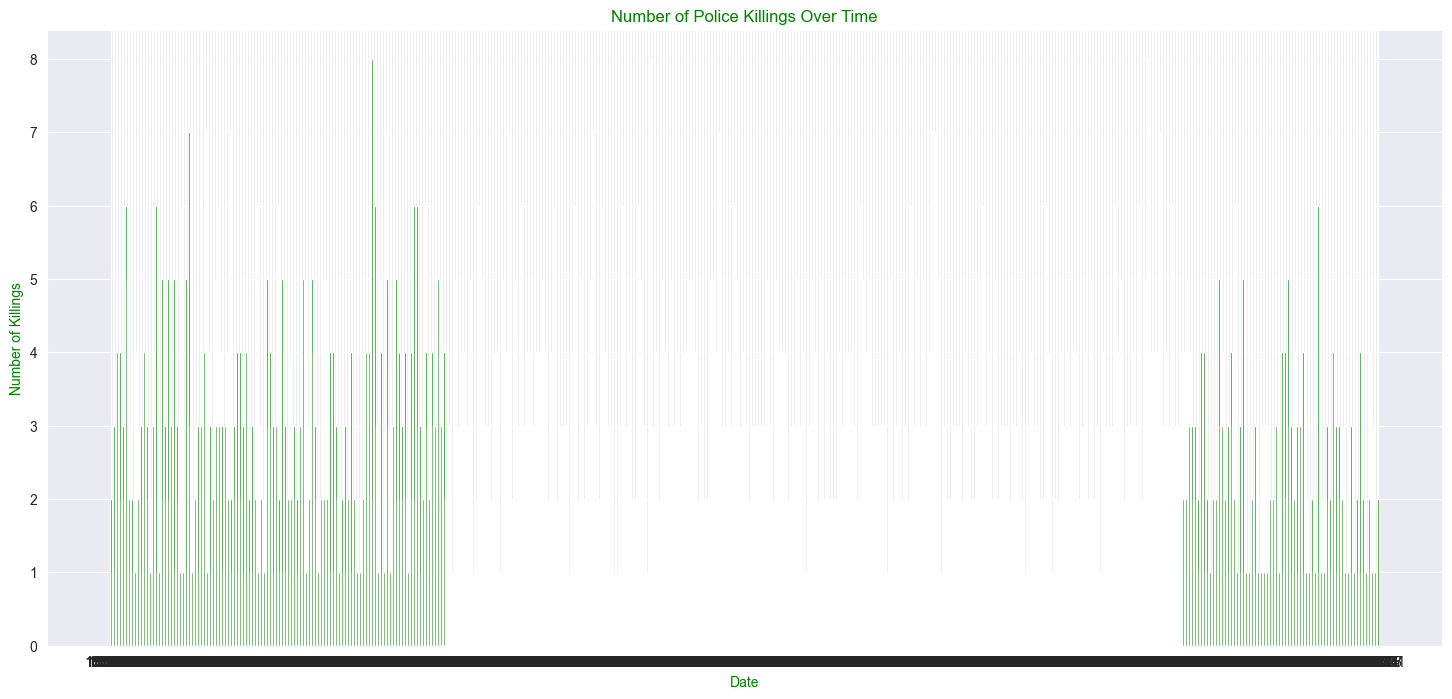

In [54]:
plt.figure(figsize=(18,8))
plt.title(f"Number of Police Killings Over Time", color='green')
plt.xlabel("Date", color='green')
plt.ylabel("Number of Killings", color='green')
plt.bar(_dates, killings_per_date, color='green')

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).